# Image Segmentation Using Color Spaces
The goal is to extcract signal data from image, using color space

In [353]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [304]:
from PIL import Image 
import sys 
import os 

In [305]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [306]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
def show_n_images(imgs,  titles = None, enlarge = 5, cmap = None):
    
    if (cmap != None):
        plt.set_cmap(cmap);
    
    n = len(imgs);
    gs1 = gridspec.GridSpec(1, n);
    
    fig1 = plt.figure(figsize=(8*len(imgs),8));
    for i in range(n):

        ax1 = fig1.add_subplot(gs1[i]);

        ax1.imshow(imgs[i], interpolation='none');
        if (titles is not None):
            ax1.set_title(titles[i], fontsize=25)

    plt.show();

In [307]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
def show_n_images_ver(imgs,  titles = None, enlarge = 5, cmap = None):
    
    if (cmap != None):
        plt.set_cmap(cmap);
    
    n = len(imgs);
    gs1 = gridspec.GridSpec(n,1);
    
    fig1 = plt.figure(figsize=(8*len(imgs),8)); 

    for i in range(n):

        ax1 = fig1.add_subplot(gs1[i]);

        ax1.imshow(imgs[i], interpolation='none');
        if (titles is not None):
            ax1.set_title(titles[i], fontsize=25)
    plt.tight_layout()
    plt.show();

# Read image

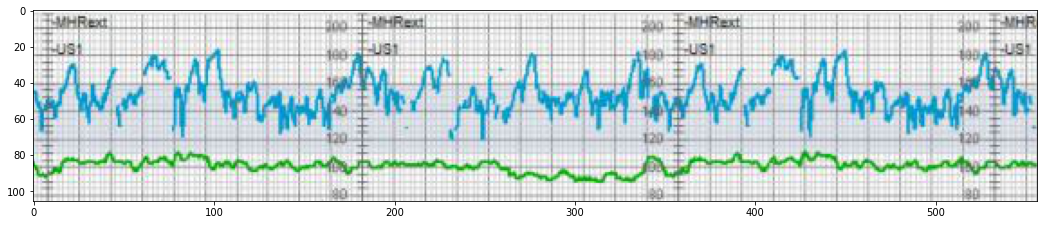

In [308]:
im = plt.imread('sigsample.jpg')
fig = plt. figure(figsize=(18,12))
plt.imshow(im)

# Visualizing image in RGB Color Space
* https://realpython.com/python-opencv-color-spaces/

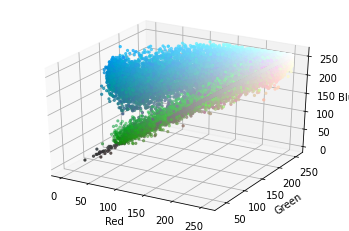

In [309]:
r, g, b = cv2.split(im)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = im.reshape((np.shape(im)[0]*np.shape(im)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# Visualizing image in HSV Color Space 

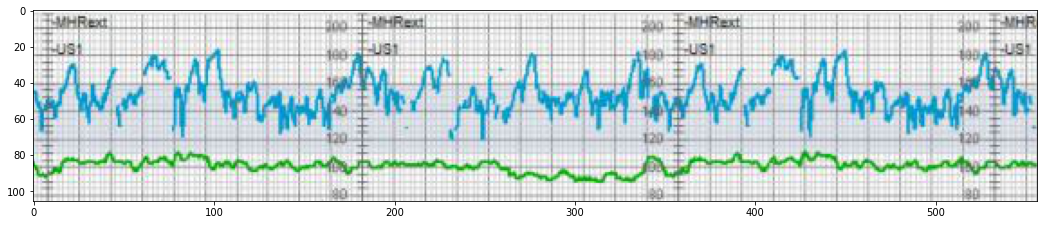

In [354]:
im = plt.imread('sigsample.jpg')
fig = plt. figure(figsize=(18,6))
plt.imshow(im)

In [355]:
pixel_colors = im.reshape((np.shape(im)[0]*np.shape(im)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

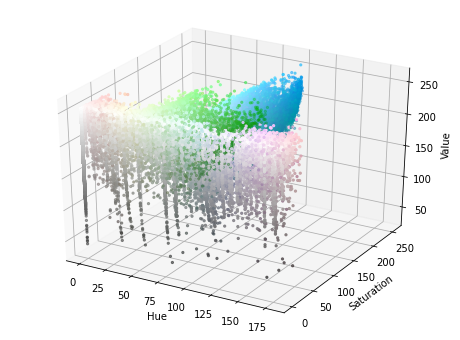

In [357]:
hsv_im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_im)
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

To make it easier, lets focus on the color we want to exctract

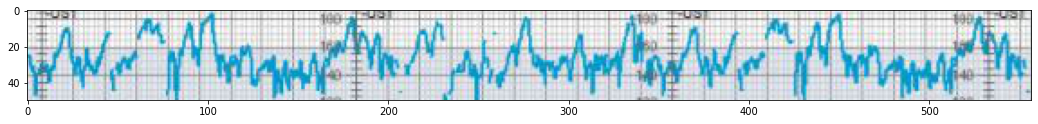

In [313]:

fig = plt. figure(figsize=(18,6))
plt.imshow(im[20:70, :])

In [314]:
im = im[20:70]
im.shape

(50, 557, 3)

In [315]:
pixel_colors = im.reshape((np.shape(im)[0]*np.shape(im)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

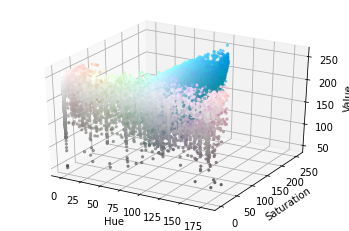

In [316]:
hsv_im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_im)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Lets minimize color data with pandas

In [317]:
ht = h.flatten()
st = s.flatten()
vt = v.flatten()

In [318]:

indl=[]
for i in range(len(pixel_colors)):
    indl.append([ht[i], st[i], vt[i], pixel_colors[i][0], pixel_colors[i][1], pixel_colors[i][2]])
len(indl)

27850

Minimize with pandas

In [319]:
df = pd.DataFrame(indl,columns=['x','y','z','h','s','t'])
df.head()

x  y    z         h         s         t
0  0  0  236  0.925490  0.925490  0.925490
1  0  0  255  1.000000  1.000000  1.000000
2  0  0  222  0.870588  0.870588  0.870588
3  0  0  248  0.972549  0.972549  0.972549
4  0  0  222  0.870588  0.870588  0.870588

In [320]:
df.shape

(27850, 6)

In [321]:
df = df.drop_duplicates(keep='first')
df.shape

(19657, 6)

In [322]:
df.head()

x  y    z         h         s         t
0  0  0  236  0.925490  0.925490  0.925490
1  0  0  255  1.000000  1.000000  1.000000
2  0  0  222  0.870588  0.870588  0.870588
3  0  0  248  0.972549  0.972549  0.972549
5  0  0  240  0.941176  0.941176  0.941176

In [323]:
ht = df.x.values
st = df.y.values
vt = df.z.values
pix_colors = df[['h','s','t']].values#/255.

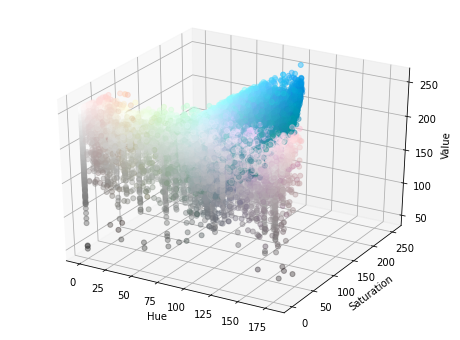

In [324]:
fig = plt.figure(figsize=(8,6))#figsize=(16,16))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(ht, st, vt, facecolors=pix_colors, marker='.', s=100, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Lets view with full axis, to get better impression of the areas

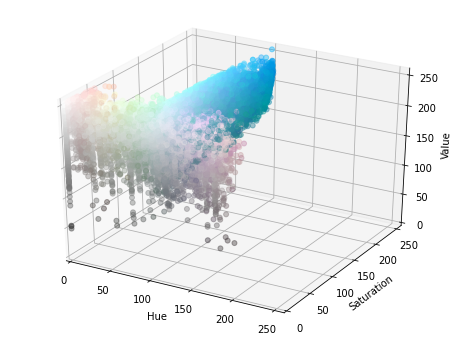

In [325]:
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlim3d(left=0, right=256) 
axis.set_ylim3d(bottom=0, top=256) 
axis.set_zlim3d(bottom=0, top=256) 

axis.scatter(ht, st, vt, facecolors=pix_colors, marker='.', s=100, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Lets view projections on axises

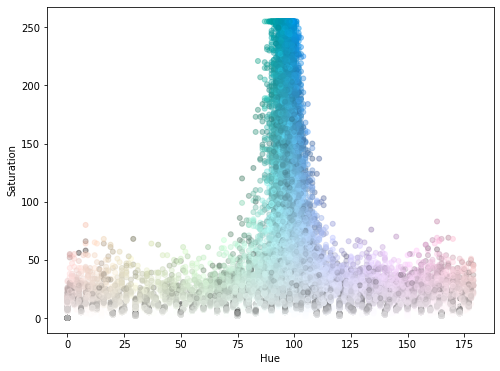

In [326]:
fig = plt.figure(figsize=(8,6))#figsize=(16,16))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(ht, st,  facecolors=pix_colors, marker='.', s=100, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
plt.show()

We can see that Heu can be bounded between ~80 and ~120

In [327]:
df = df[(df.x<=120) & (df.x>=80)]

In [328]:
ht = df.x.values
st = df.y.values
vt = df.z.values
pix_colors = df[['h','s','t']].values#/255.

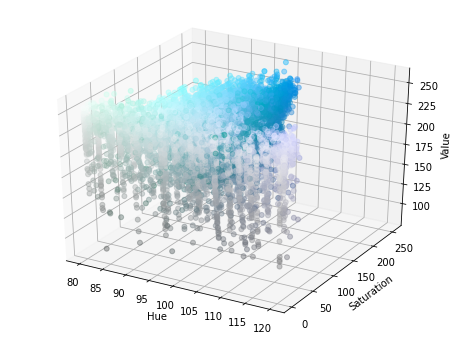

In [329]:
fig = plt.figure(figsize=(8,6))#figsize=(16,16))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(ht, st, vt, facecolors=pix_colors, marker='.', s=100, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Lest view more projections

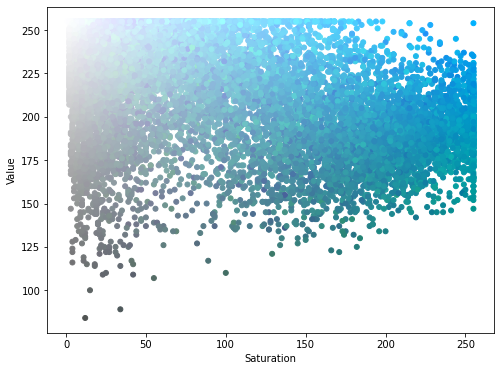

In [330]:
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel("Saturation")
axis.set_ylabel("Value")
axis.scatter( st, vt, facecolors=pix_colors, marker='.', s=100)
plt.show()

we can try bound Saturation to be > 50

In [331]:
df = df[df.y>50]

In [332]:
ht = df.x.values
st = df.y.values
vt = df.z.values
pix_colors = df[['h','s','t']].values#/255.

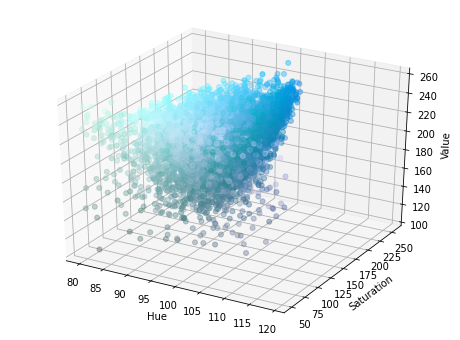

In [333]:
fig = plt.figure(figsize=(8,6))#figsize=(16,16))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(ht, st, vt, facecolors=pix_colors, marker='.', s=100, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [334]:
df = df[df.x<100]

In [335]:
ht = df.x.values
st = df.y.values
vt = df.z.values
pix_colors = df[['h','s','t']].values#/255.

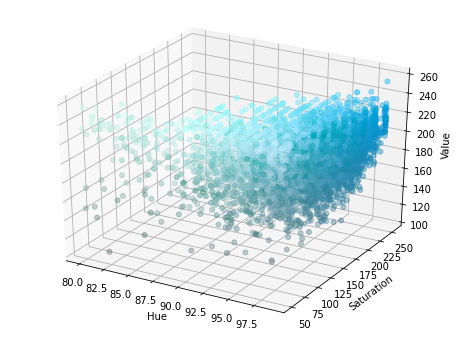

In [336]:
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(ht, st, vt, facecolors=pix_colors, marker='.', s=100, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

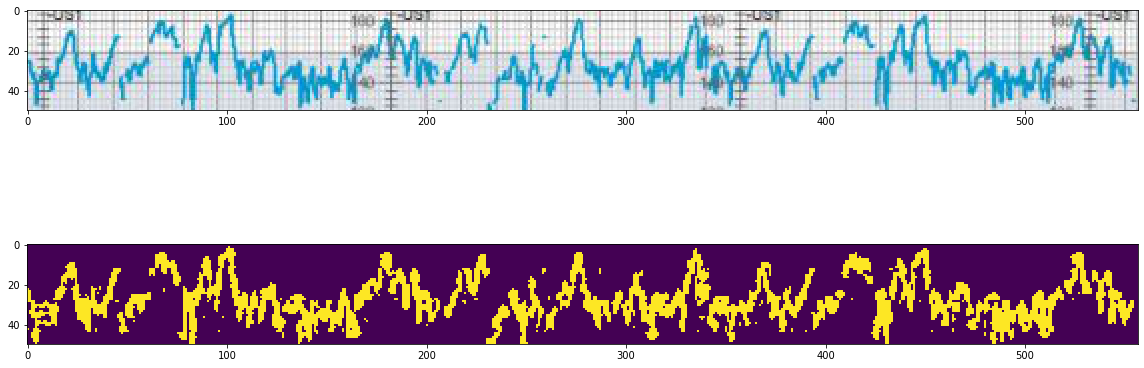

In [337]:
    hsv_im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    lower_blue = np.array([78, 50, 100])
    upper_blue = np.array([100, 255, 255])
    mask = cv2.inRange(hsv_im, lower_blue, upper_blue)
    res = cv2.bitwise_and(im,im,mask)
    show_n_images_ver([res, mask])

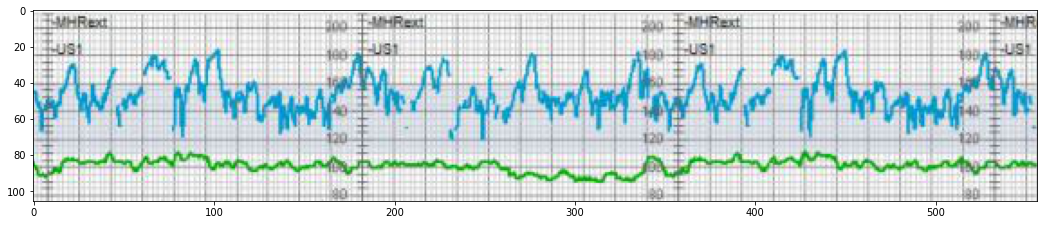

In [338]:
im = plt.imread('sigsample.jpg')
fig = plt. figure(figsize=(18,6))
plt.imshow(im)

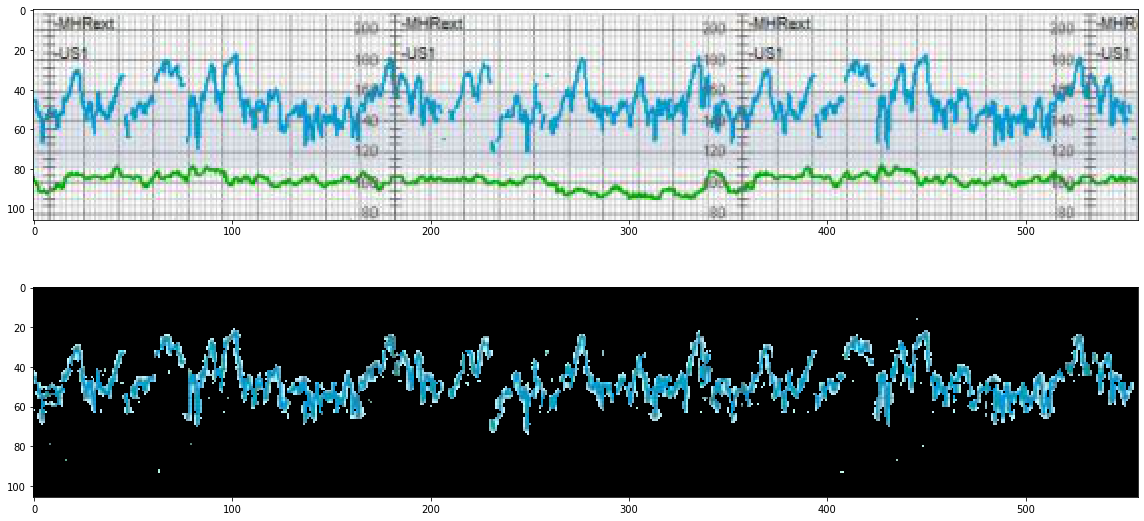

In [339]:
    hsv_im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    lower_blue = np.array([78, 50, 100])
    upper_blue = np.array([100, 255, 255])
    mask = cv2.inRange(hsv_im, lower_blue, upper_blue)
    res = cv2.bitwise_and(im,im,mask)
    mask3 = np.repeat(mask[:,:,np.newaxis], 3, axis=2)/255
    masked_im = im*mask3/255.
    show_n_images_ver([res, masked_im])

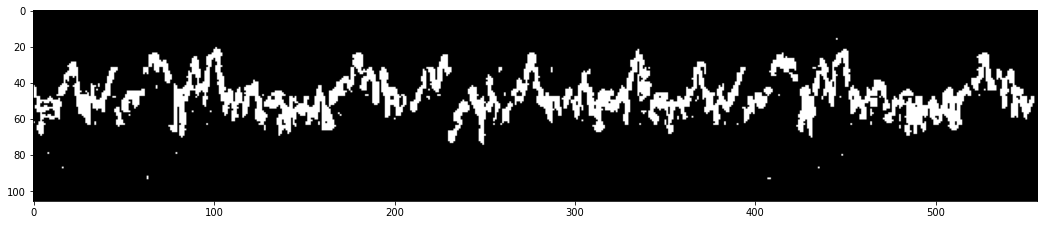

In [340]:
fig = plt.figure(figsize=(18,6))
mask3 = np.repeat(mask[:,:,np.newaxis], 3, axis=2)/255
plt.imshow(mask3)

In [341]:
im.shape, mask3.shape, mask.dtype, im.dtype, (im*mask3).min(), (im*mask3).max()

((106, 557, 3), (106, 557, 3), dtype('uint8'), dtype('uint8'), 0.0, 255.0)

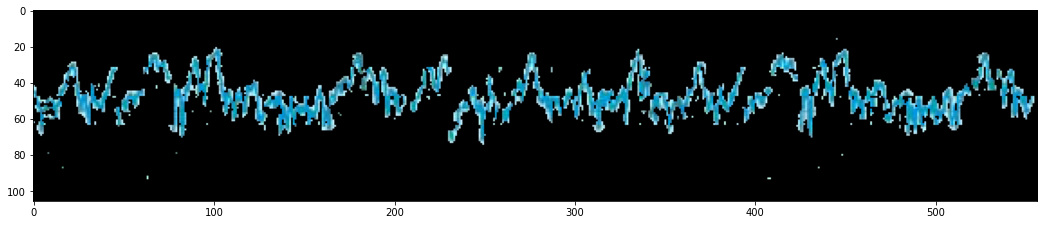

In [342]:
fig = plt.figure(figsize=(18,6))
plt.imshow(im*mask3/255.)

We need to omit the lighter blue

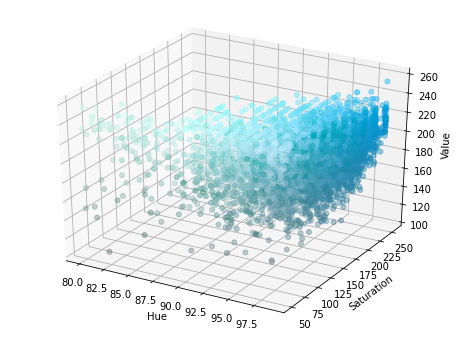

In [343]:
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(ht, st, vt, facecolors=pix_colors, marker='.', s=100, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

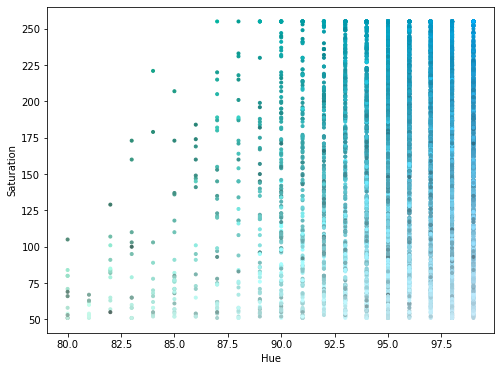

In [344]:
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(ht, st, facecolors=pix_colors, marker='.')#, s=150, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
plt.show()

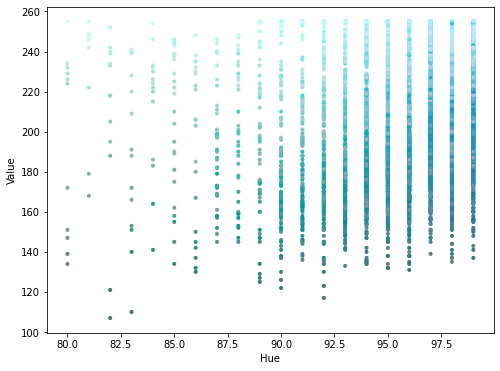

In [345]:
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(ht, vt, facecolors=pix_colors, marker='.')#, s=150, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Value")
plt.show()

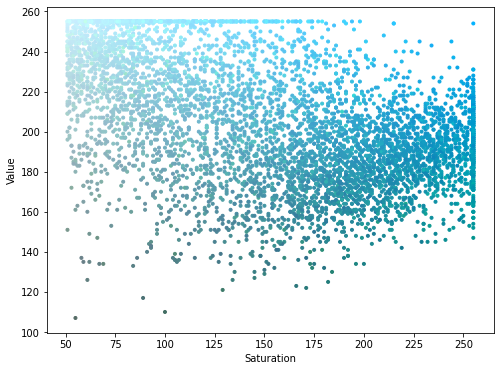

In [346]:
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(st, vt, facecolors=pix_colors, marker='.')#, s=150, alpha=0.4)
axis.set_xlabel("Saturation")
axis.set_ylabel("Value")
plt.show()

In [347]:
df = df[df.z<240]

In [348]:
ht = df.x.values
st = df.y.values
vt = df.z.values
pix_colors = df[['h','s','t']].values#/255.

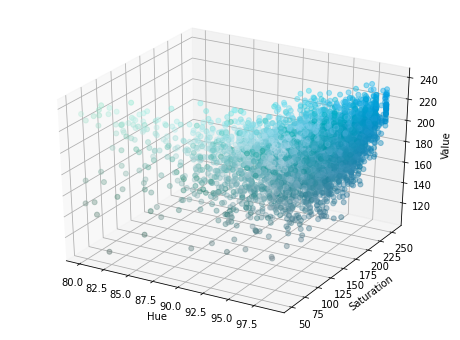

In [349]:
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(ht, st, vt, facecolors=pix_colors, marker='.', s=100, alpha=0.4)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

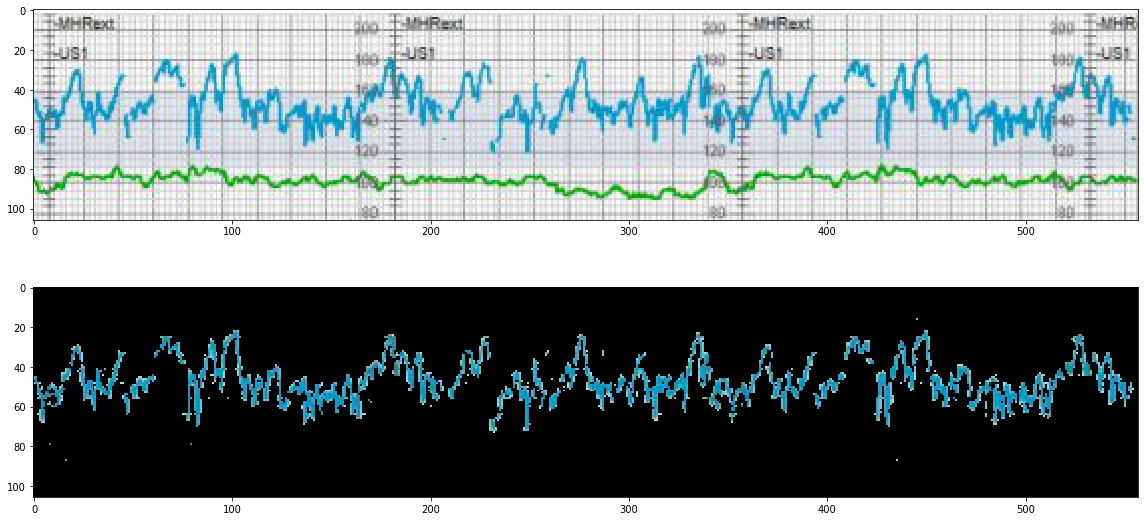

In [350]:
    hsv_im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    lower_blue = np.array([78, 50, 100])
    upper_blue = np.array([100, 255, 230])
    mask = cv2.inRange(hsv_im, lower_blue, upper_blue)
    res = cv2.bitwise_and(im,im,mask)
    mask3 = np.repeat(mask[:,:,np.newaxis], 3, axis=2)/255
    show_n_images_ver([res, im*mask3/255.])

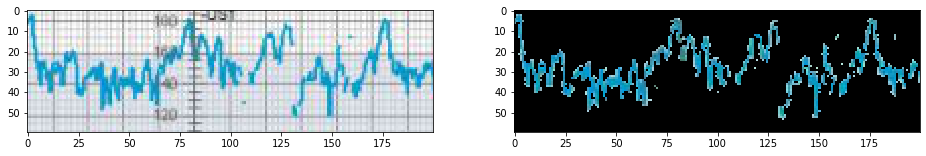

In [352]:
    hsv_im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    lower_blue = np.array([78, 50, 100])
    upper_blue = np.array([100, 255, 230])
    mask = cv2.inRange(hsv_im, lower_blue, upper_blue)
    res = cv2.bitwise_and(im,im,mask)
    mask3 = np.repeat(mask[:,:,np.newaxis], 3, axis=2)/255
    masked_im = im*mask3/255.
    show_n_images([res[20:80,100:300], masked_im[20:80,100:300]])